In [10]:
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [11]:
from src import train, generate, eval
from modules.config import read_config
import modules.plots as plots
from modules.datageneration import load_data, data_functions
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
BASE_DIR = "../tests/high_dim_models/3x512/"
PROFILE = "sin1-3x512-s03"

In [18]:
configs = read_config(f"{BASE_DIR}/config.ini")
dataset_configs = read_config(f"{BASE_DIR}/dataset_config.ini")

config = configs[PROFILE]
NAME = config["NAME"]
dataset_config = dataset_configs[config["DATASET"]]
DATASET_NAME = dataset_config["NAME"]

====== Generating profile sin-10x-10k-s03 ======
Train: (-2, 2)
Y-space: -28.97916243957459 - 28.358546290436735
In Domain: (-2, 2)
Y-space: -26.732160525297626 - 26.706403636479305
Out Domain: (-4, 4)
Y-space: -23.5704830753314 - 25.989163115956657


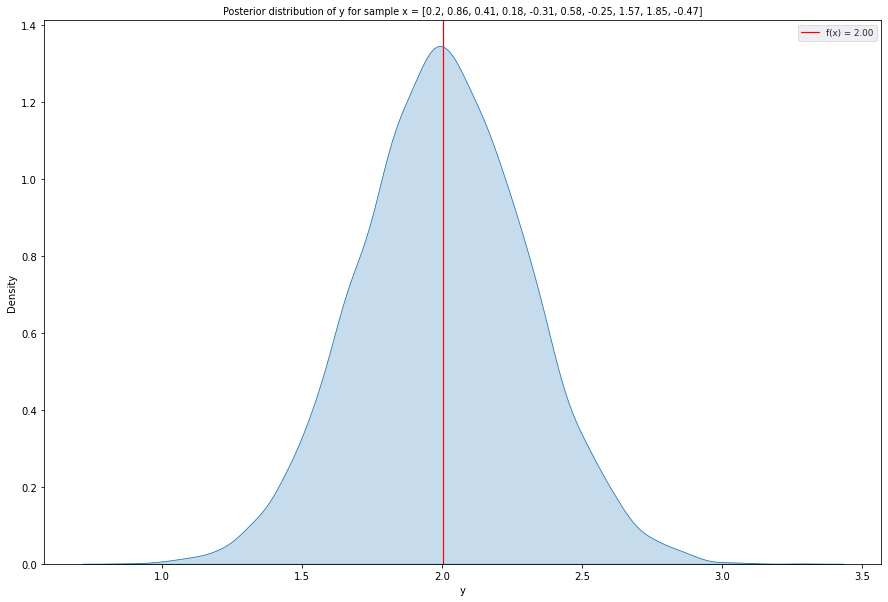

In [19]:
if True:
    if not os.path.exists(f"{BASE_DIR}/datasets"):
                os.mkdir(f"{BASE_DIR}/datasets")
    generate.gen(dataset_config, f"{BASE_DIR}/datasets")

In [12]:
(x_train, y_train), (x_val, y_val), (x_test, y_test), (x_test_in_domain, y_test_in_domain), (x_test_out_domain, y_test_out_domain) = load_data(f"{BASE_DIR}/datasets/{DATASET_NAME}")

In [13]:
x_train[0], y_train[0]

(tensor([0.9763]), tensor(4.9796))

In [14]:
#Min y and max y of the train data
y_min = y_train.min()
y_max = y_train.max()
print(f"Train Data: | y_min: {y_min}, y_max: {y_max}")

#Min y and max y of the train data
y_min = y_test_in_domain.min()
y_max = y_test_in_domain.max()
print(f"Test Data in domain: | y_min: {y_min}, y_max: {y_max}")

#Min y and max y of the train data
y_min = y_test_out_domain.min()
y_max = y_test_out_domain.max()
print(f"Test data out domain: | y_min: {y_min}, y_max: {y_max}")

Train Data: | y_min: -6.030533790588379, y_max: 6.033327102661133
Test Data in domain: | y_min: -6.016025543212891, y_max: 6.023136615753174
Test data out domain: | y_min: -6.028061389923096, y_max: 6.019716739654541
